In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from Scratch_Neural_Net.scratch_neural_network import Scratch_Neural_Network

In [50]:
data = pd.read_csv("data/train.csv")

In [51]:
data.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21123,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24065,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19228,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3731,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16686,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7796,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33677,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_transposed = data[0:1000].T
y_transposed = data_transposed[0]
x_transposed = data_transposed[1:n]
x_transposed = x_transposed / 255.

data_transposed_train = data[1000:m].T
y_train = data_transposed_train[0]
x_train = data_transposed_train[1:n]
x_train = x_train / 255.

_,m_train = x_train.shape


In [53]:
scnn = Scratch_Neural_Network(m, n)

def test_prediction(index, W1, b1, W2, b2, x, y):
    plt.gray()
    plt.figure(figsize=(10,6))
    
    for i in range(index):
        current_image = x[:, i, None]
        prediction = scnn.predict(x[:, i, None], W1, b1, W2, b2)
        label = y[i] 
        current_image = current_image.reshape((28, 28)) * 255
        plt.subplot(3,4,i+1)
        plt.imshow(current_image, interpolation='nearest')
        plt.title(f"Prediction: {prediction}")
        plt.suptitle(f"Predictions")
        plt.axis('off')
    plt.show()


In [54]:
w1, b1, w2, b2 = scnn.train(x_train, y_train, 150, 0.5)

[===================================================================================================================================================== ] 100.00% Complete
[3 2 1 ... 1 2 0]
Acc 85.25%


<Figure size 640x480 with 0 Axes>

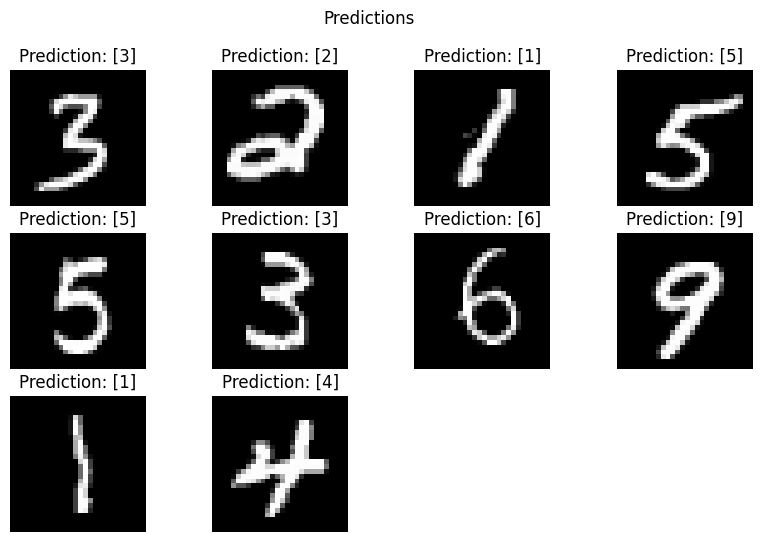

In [61]:
test_prediction(10, w1, b1, w2, b2, x_train, y_train)

<Figure size 640x480 with 0 Axes>

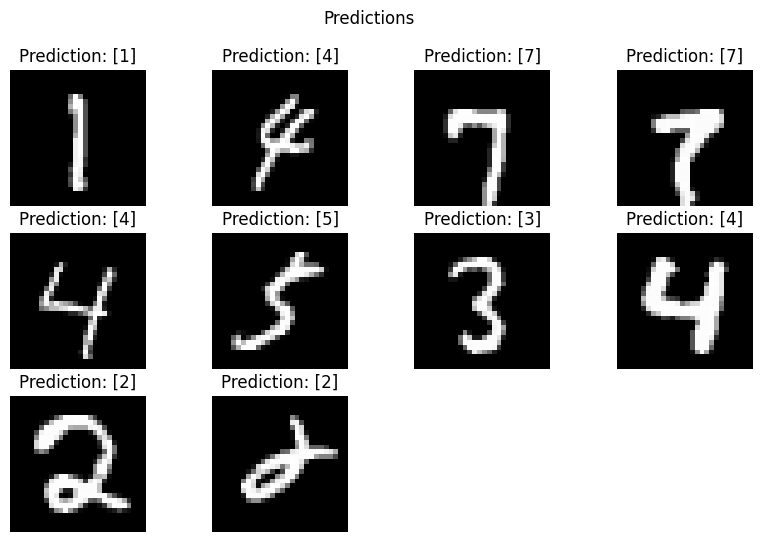

Model Accuracy on unseen data: 85.50%


In [62]:
test_prediction(10, w1, b1, w2, b2, x_transposed, y_transposed)
predictions = scnn.predict(x_transposed, w1, b1, w2, b2)
acc = np.sum(predictions == y_transposed) / y_transposed.size
print(f"Model Accuracy on unseen data: {acc:.2%}")